# Lax-Wendroff scheme

In [2]:
# Import libraries

import matplotlib.pyplot as plt
import numpy as np

### 1. Space discretisation:

In [6]:
# Number of elements along the X axis
nx = 101

# Define the domain boundaries
x_max = +2.
x_min = -2.

# Resolution along x
delta_x = (x_max - x_min)/(nx - 1)
#print(delta_x)

# Generate the x vector
x = np.linspace(x_min, x_max, nx)
#print(x)

### 2. Define the initial condition

In [7]:
# IC function
def u_x(x_axis):
    
    """
    This defines/returns a 1D Gaussian.
    
    Input: x -> x_axis
    Output: Gaussian
    """
    
    return np.exp(-0.5*(x/0.4)**2)


In [8]:
# Save the IC (Gaussian) into an object:

u_0 = u_x(x)

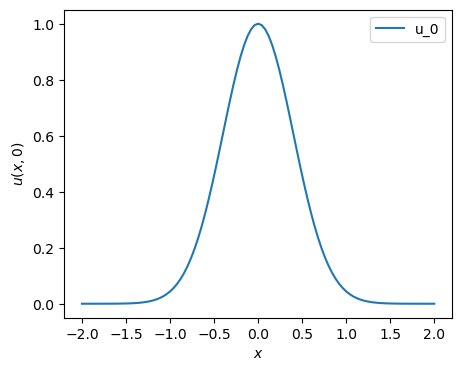

In [9]:
# Plotting

plt.figure(figsize=(5,4))

plt.plot(x, u_0, label = "u_0")

plt.xlabel(r"$x$")
plt.ylabel(r"$u(x,0)$")

plt.legend()

plt.show()



### 3. Time discretisation:

In [12]:
# CFL number
cfl = 0.8

# Speed perturbation
c = 1.

# Time step
delta_t = cfl*delta_x/c

#print(delta_t)

# Min/Max time:
t_min = 0.
t_max = 10.

# Time axis:

t = np.arange(t_min, t_max, delta_t)

#print(t.shape)

### 4. Define theta (i.e. the coef of parabolic term)


In [14]:
# For stability and consistency, theta = CFL^2

theta = cfl**2

#theta = 0.2

#print(theta)

### 5. Carry out the numerical integration

### Create Empty solution array

In [21]:
# Empty array

u_sln = np.zeros((len(t), len(x)))

print(np.unique(u_sln))

[0.]


### Add initial condition

In [25]:
u_sln[0, :] = u_0 # This is our Gaussian 

#print(u_sln[0, :])

#print(u_sln)

### Integration step, time loop:

In [26]:
for j in range(0, len(t) - 1):
    
    for i in range(1, nx - 1):
        
        # Lax-Wendroff scheme
        u_sln[j+1, i] = u_sln[j, i] - 0.5*cfl*(u_sln[j, i+1]\
        - u_sln[j, i-1]) + 0.5*theta*(u_sln[j, i+1]\
        - 2*u_sln[j, i] + u_sln[j, i-1]) 
        
    # Boundary conditions
    u_sln[j+1, 0] = u_sln[j, nx - 2]
    u_sln[j+1, nx - 1] = u_sln[j+1, 0]

print(u_sln.shape)
        

(313, 101)


In [28]:
#print(u_sln)

### Solution plot:

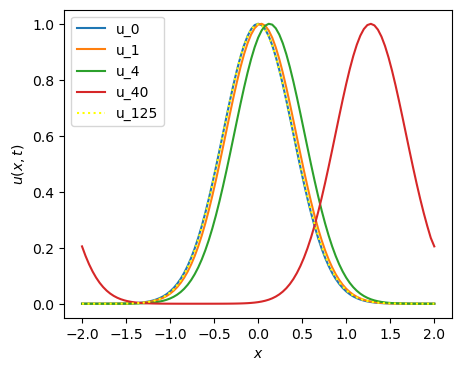

In [33]:
# Plotting

plt.figure(figsize=(5,4))

# Plot the IC -> Gaussian
plt.plot(x, u_sln[0, :], label = "u_0")

# The first time
plt.plot(x, u_sln[1, :], label = "u_1")

plt.plot(x, u_sln[4, :], label = "u_4")
plt.plot(x, u_sln[40, :], label = "u_40")
plt.plot(x, u_sln[125, :], label = "u_125", linestyle=":", color = "yellow")

plt.xlabel(r"$x$")
plt.ylabel(r"$u(x,t)$")

plt.legend()

plt.show()



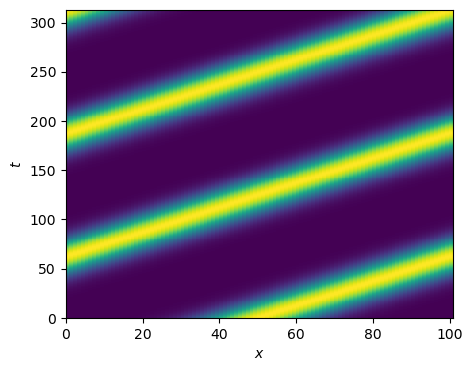

In [34]:
# Plotting

plt.figure(figsize=(5,4))

plt.pcolor(u_sln)

plt.xlabel(r"$x$")
plt.ylabel(r"$t$")

plt.show()

In [36]:
# Create a meshgrid
x_grid, t_grid = np.meshgrid(x, t)

print(x_grid.shape, t_grid.shape)

(313, 101) (313, 101)


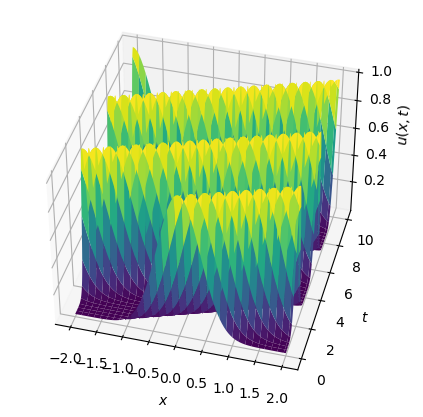

In [59]:
fig = plt.figure(figsize=(6,5))

ax = plt.axes(projection='3d')
ax.plot_surface(x_grid, t_grid, u_sln, cmap='viridis') # Creates 'n=10' contours at different Z to make the surface

ax.set_xlabel(r'$x$')  # Customised labels for axes
ax.set_ylabel(r'$t$')
ax.set_zlabel(r'$u(x,t)$')

ax.view_init(40, -75)

plt.show()